### Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.4 * 2, 4.8 * 2)

### Helpers

In [2]:
def make_batch(x, y, size):
  assert x.shape[0] == y.shape[0]
  idx = np.random.permutation(x.shape[0])[:size]
  return x[idx], y[idx]

### Generate dataset

In [3]:
m = 100
x_train = np.linspace(0, 100, m)
y_train = x_train / 2 + (np.random.random(x_train.shape) - 0.5) * 10 + 50

# Normalize
x_train = (x_train - np.mean(x_train)) / (np.max(x_train) - np.min(x_train))
# y_train = (y_train - np.mean(y_train)) / (np.max(y_train) - np.min(y_train))

### Visualize dataset

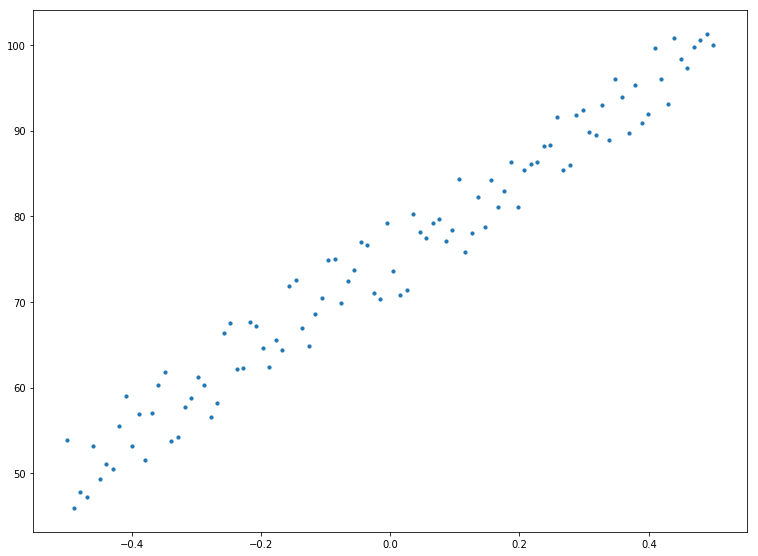

In [4]:
plt.scatter(x_train, y_train, s=10)

### Build a graph

In [5]:
batch_size = 8
learning_rate = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, [None])
y_ = tf.placeholder(tf.float32, [None])

w = tf.Variable(tf.constant(0.1))
b = tf.Variable(tf.constant(0.1))

y = x * w + b
err = y - y_

loss = tf.reduce_mean(tf.pow(err, 2)) / 2

w_grad = tf.reduce_mean(err * x)
b_grad = tf.reduce_mean(err)

with tf.control_dependencies([w_grad, b_grad]):
  train = tf.group(w.assign(w - learning_rate * w_grad),
                   b.assign(b - learning_rate * b_grad))

init = tf.global_variables_initializer()

### Train

In [6]:
steps = 10000
lr = 0.01
descents = []

with tf.Session() as sess:
  sess.run(init)  
  
  for step in range(steps):
    x_batch, y_batch = make_batch(x_train, y_train, batch_size)
    sess.run(train, feed_dict={x: x_batch, y_: y_batch, learning_rate: lr})
    
    if step % 500 == 0:
      w_, b_, l = sess.run([w, b, loss], feed_dict={x: x_train, y_: y_train})
      descents.append([w_, b_, l])
      print('step: %d, loss: %f' % (step, l))
      
  # Data for visualiztion
  prediction_train = sess.run(y, feed_dict={x: x_train})
  descents = np.array(descents)
  w_best, b_best = sess.run([w, b])
  size = 15
  resolution = 75
  ws = w_best + np.linspace(-size, size, resolution)
  bs = b_best + np.linspace(-size, size, resolution)

  WS, BS = np.meshgrid(ws, bs)
  LS = np.zeros(WS.shape)

  for i in range(WS.shape[0]):
    for j in range(WS.shape[1]):
      LS[i, j] = sess.run(loss, feed_dict={w: WS[i, j], b: BS[i, j], x: x_train, y_: y_train})

step: 0, loss: 2858.043701
step: 500, loss: 50.339005
step: 1000, loss: 23.997015
step: 1500, loss: 12.517512
step: 2000, loss: 7.612042
step: 2500, loss: 5.636579
step: 3000, loss: 4.750424
step: 3500, loss: 4.390095
step: 4000, loss: 4.239298
step: 4500, loss: 4.161730
step: 5000, loss: 4.141238
step: 5500, loss: 4.124802
step: 6000, loss: 4.117325
step: 6500, loss: 4.117916
step: 7000, loss: 4.109690
step: 7500, loss: 4.117842
step: 8000, loss: 4.119379
step: 8500, loss: 4.113069
step: 9000, loss: 4.117236
step: 9500, loss: 4.113096


### Visualize

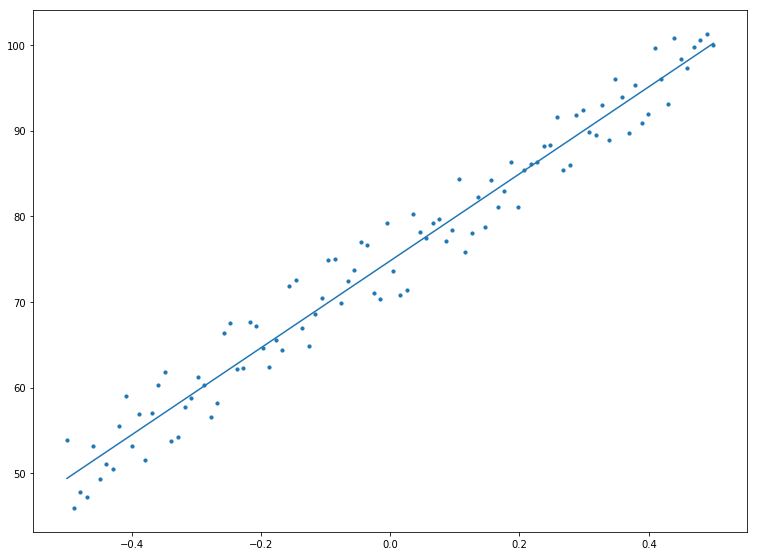

In [7]:
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, prediction_train)

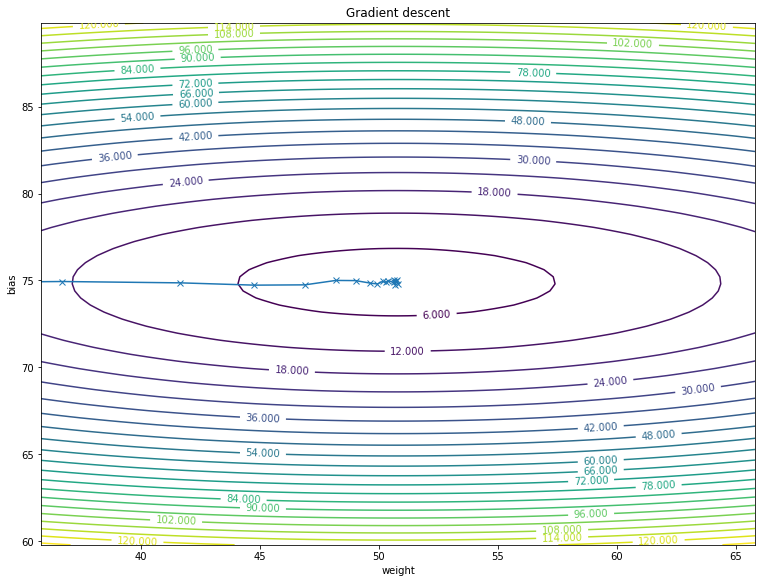

In [8]:
CS = plt.contour(WS, BS, LS, 20)
plt.plot(descents[:, 0], descents[:, 1], '-x')
plt.xlim(ws[0], ws[-1])
plt.ylim(bs[0], bs[-1])
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel('weight')
plt.ylabel('bias')
plt.title('Gradient descent')

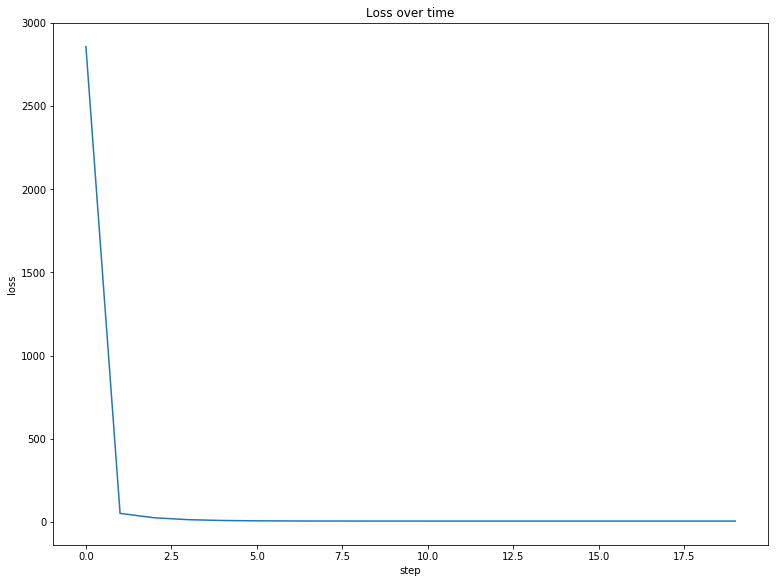

In [9]:
plt.plot(np.arange(0, descents.shape[0]), descents[:, 2])
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Loss over time')